In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../../tests/hairstyle_prediction_dataset_1000.csv')  # go up one level and into 'data'
df.head()

,face_width,jaw_width,forehead_width,chin_length,face_shape,best_hairstyle
0,145,124,134,47,heart,chin_length_bob
1,149,122,131,49,heart,chin_length_bob
2,139,131,130,43,round,layered_bob
3,154,130,148,46,oval,straight_cut
4,155,143,146,57,oblong,fringe_bangs


In [16]:
# Check for missing values
print(df.isnull().sum())

# Optionally drop rows with missing values
df.dropna(inplace=True)

# Encode categorical data (e.g., turn text into numbers)
from sklearn.preprocessing import LabelEncoder

le_face = LabelEncoder()
le_hair = LabelEncoder()

df['face_shape_encoded'] = le_face.fit_transform(df['face_shape'])
df['hairstyle_encoded'] = le_hair.fit_transform(df['best_hairstyle'])

df.head()

face_width        0
jaw_width         0
forehead_width    0
chin_length       0
face_shape        0
best_hairstyle    0
dtype: int64


,face_width,jaw_width,forehead_width,chin_length,face_shape,best_hairstyle,face_shape_encoded,hairstyle_encoded
0,145,124,134,47,heart,chin_length_bob,0,0
1,149,122,131,49,heart,chin_length_bob,0,0
2,139,131,130,43,round,layered_bob,3,3
3,154,130,148,46,oval,straight_cut,2,10
4,155,143,146,57,oblong,fringe_bangs,1,2


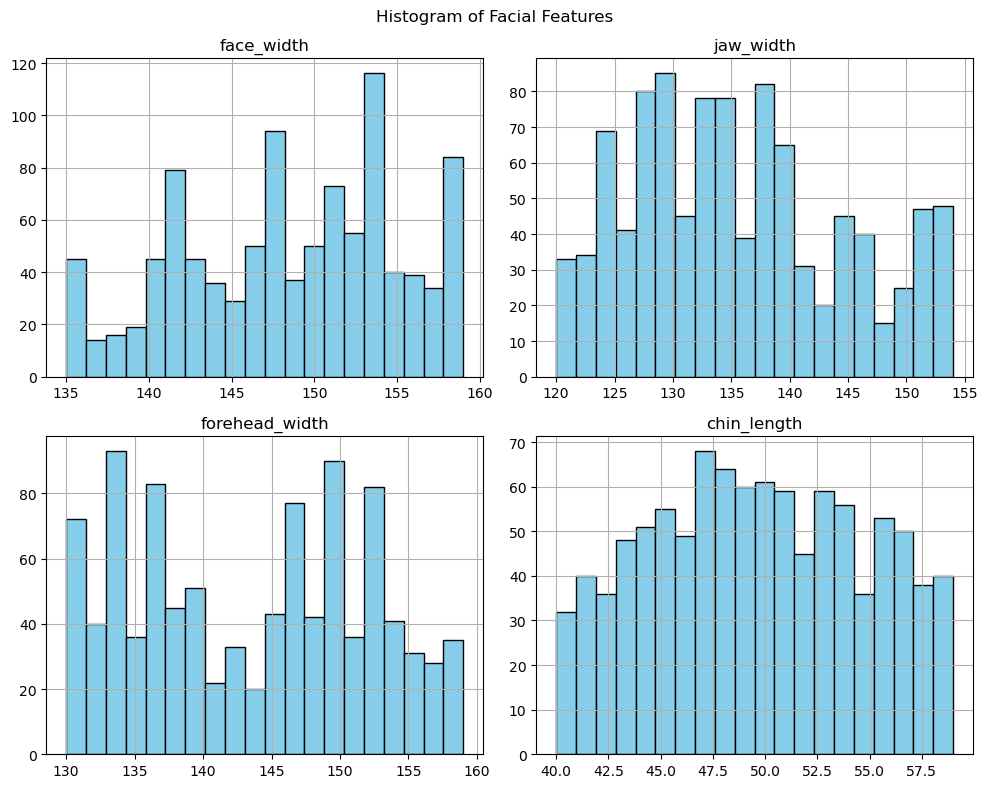

In [17]:
features = ['face_width', 'jaw_width', 'forehead_width', 'chin_length']
df[features].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Facial Features')
plt.tight_layout()
plt.show()

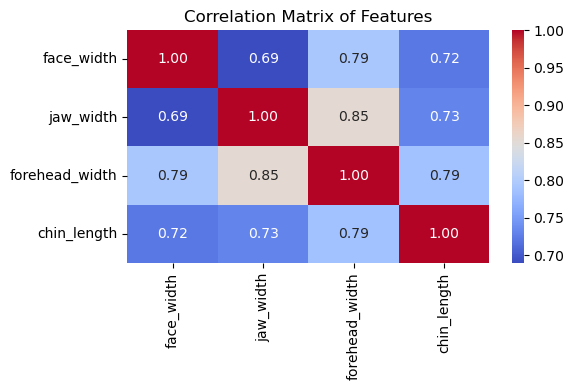

In [18]:
plt.figure(figsize=(6, 4))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

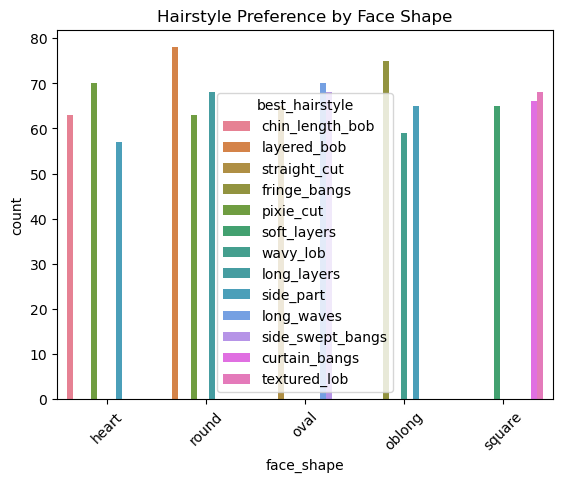

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of hairstyles by face shape
sns.countplot(data=df, x='face_shape', hue='best_hairstyle')
plt.xticks(rotation=45)
plt.title('Hairstyle Preference by Face Shape')
plt.show()


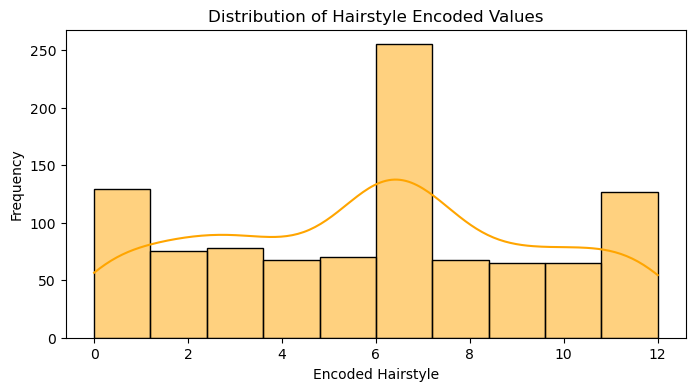

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(df['hairstyle_encoded'], kde=True, bins=10, color='orange')
plt.title('Distribution of Hairstyle Encoded Values')
plt.xlabel('Encoded Hairstyle')
plt.ylabel('Frequency')
plt.show()


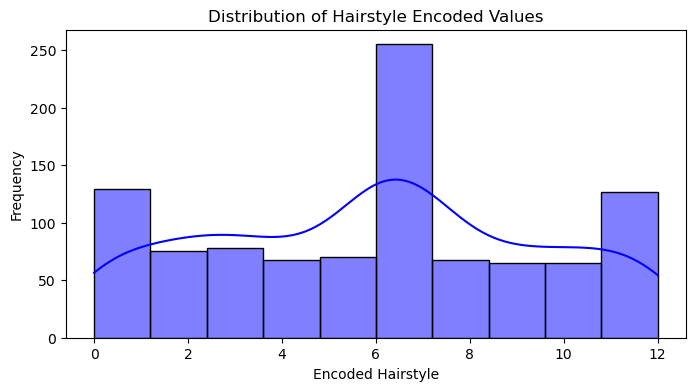

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(df['hairstyle_encoded'], kde=True, bins=10, color='blue')
plt.title('Distribution of Hairstyle Encoded Values')
plt.xlabel('Encoded Hairstyle')
plt.ylabel('Frequency')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['face_shape_encoded']]  # You can later add more features
y = df['hairstyle_encoded']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
